# **Problem Statement**

---

Analyze air quality trends across cities using pollutant and AQI data to identify key contributors to poor air quality. Develop insights to predict AQI and categorize cities based on pollution levels

# **Objective**

---


This dataset tracks air quality across cities by recording pollutant levels and environmental factors. It helps analyze the impact of pollutants on the Air Quality Index (AQI) and supports the development of predictive models. The data aids in identifying high-risk areas, guiding pollution control strategies, and improving public health management. It also raises awareness about the health risks associated with poor air quality.

# **Libraries**

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Understanding the Data**

In [108]:
df=pd.read_csv('city_day.csv')
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


 **Data Description**

---

* **City:** Name of the city where air quality measurements were taken.
* **Date:** The date on which the data was recorded.
* **Pollutant Measurements** (in micrograms per cubic meter or equivalent units):
  * **PM2.5:** Fine particulate matter (diameter ≤ 2.5 μm), harmful to respiratory health.
  * **PM10:** Particulate matter (diameter ≤ 10 μm), associated with respiratory and cardiovascular issues.
  * **NO:** Nitric oxide, a precursor to ozone and acid rain.
  * **NO2:** Nitrogen dioxide, contributing to smog and acid rain.
  * **NOx:** Sum of nitric oxide (NO) and nitrogen dioxide (NO2).
  * **NH3:** Ammonia, a contributor to particulate formation.
  * **CO:** Carbon monoxide, a toxic air pollutant.
  * **SO2:** Sulfur dioxide, a cause of acid rain.
  * **O3:** Ozone, a secondary pollutant formed from other emissions.
  * **Benzene, Toluene, Xylene**: Volatile organic compounds harmful to human health.
* **Air Quality Index (AQI):**
  * A composite measure reflecting overall air quality based on pollutant levels.
* **AQI_Bucket:**
  * Categorical representation of AQI levels, such as "Good," "Moderate," or "Poor."

In [109]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [110]:
df.tail()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory
29530,Visakhapatnam,2020-07-01,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,NaN,NaN,NaN,50.0,Good


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [112]:
df.shape

(29531, 16)

In [113]:
df.isnull().sum()

,0
City,0
Date,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854


In [114]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


# **Visualisation**

array([[<Axes: title={'center': 'PM2.5'}>,
        <Axes: title={'center': 'PM10'}>, <Axes: title={'center': 'NO'}>,
        <Axes: title={'center': 'NO2'}>],
       [<Axes: title={'center': 'NOx'}>, <Axes: title={'center': 'NH3'}>,
        <Axes: title={'center': 'CO'}>, <Axes: title={'center': 'SO2'}>],
       [<Axes: title={'center': 'O3'}>,
        <Axes: title={'center': 'Benzene'}>,
        <Axes: title={'center': 'Toluene'}>,
        <Axes: title={'center': 'Xylene'}>],
       [<Axes: title={'center': 'AQI'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

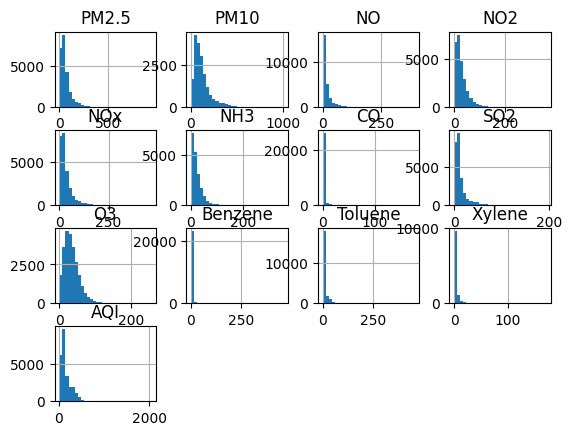

In [115]:
df.hist(bins=30)

# **Cleaning Data**

In [116]:
#Feature Engineering

# Convert the 'date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract the year
df['Year'] = df['Date'].dt.year

# Extract the month
df['Month'] = df['Date'].dt.month

# Extract the day of the week (0 = Monday, 6 = Sunday)
df['DayOfWeek'] = df['Date'].dt.dayofweek

# droping previous column
df.drop("Date", axis=1, inplace=True)

In [117]:
df.drop(columns=['AQI_Bucket'],inplace=True)

In [118]:
df.drop(columns=['Xylene'],inplace=True)

In [119]:
df["PM2.5"].fillna(df["PM2.5"].median(),inplace=True)
df["PM10"].fillna(df["PM10"].median(),inplace=True)
df["NO"].fillna(df["NO"].median(),inplace=True)
df["NO2"].fillna(df["NO2"].median(),inplace=True)
df["NOx"].fillna(df["NOx"].median(),inplace=True)
df["NH3"].fillna(df["NH3"].median(),inplace=True)
df["CO"].fillna(df["CO"].median(),inplace=True)
df["SO2"].fillna(df["SO2"].median(),inplace=True)
df["O3"].fillna(df["O3"].median(),inplace=True)
df["Benzene"].fillna(df["Benzene"].median(),inplace=True)
df["Toluene"].fillna(df["Toluene"].median(),inplace=True)
df["AQI"].fillna(df["AQI"].median(),inplace=True)

<ipython-input-119-030e213fba53>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["PM2.5"].fillna(df["PM2.5"].median(),inplace=True)
<ipython-input-119-030e213fba53>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

In [120]:
df.isnull().sum()

,0
City,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,0
CO,0
SO2,0
O3,0


# **Encoding**

In [121]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df['City']=labelencoder.fit_transform(df['City'])

In [122]:
df

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,Year,Month,DayOfWeek
0,0,48.57,95.68,0.92,18.22,17.15,15.85,0.92,27.64,133.36,0.00,0.02,118.0,2015,1,3
1,0,48.57,95.68,0.97,15.69,16.46,15.85,0.97,24.55,34.06,3.68,5.50,118.0,2015,1,4
2,0,48.57,95.68,17.40,19.30,29.70,15.85,17.40,29.07,30.70,6.80,16.40,118.0,2015,1,5
3,0,48.57,95.68,1.70,18.48,17.97,15.85,1.70,18.59,36.08,4.43,10.14,118.0,2015,1,6
4,0,48.57,95.68,22.10,21.42,37.76,15.85,22.10,39.33,39.31,7.01,18.89,118.0,2015,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,25,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,41.0,2020,6,5
29527,25,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,70.0,2020,6,6
29528,25,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,68.0,2020,6,0
29529,25,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,54.0,2020,6,1


# **Correlation Analysis**

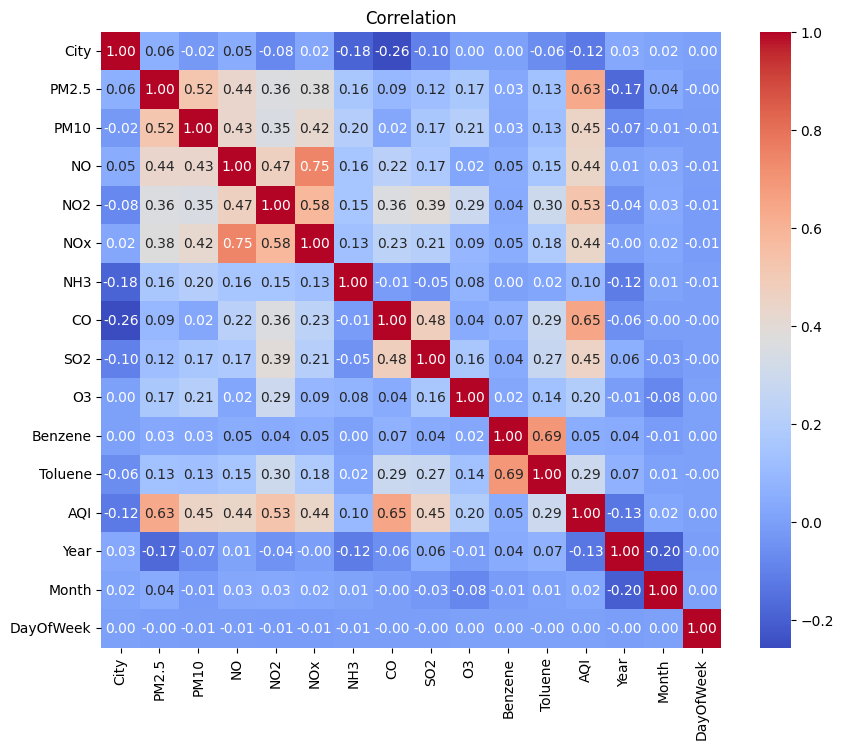

In [123]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),fmt='0.2f',annot=True,cmap='coolwarm')
plt.title('Correlation')
plt.show()

In [124]:
a=df.corr()['AQI']
a=a.sort_values(ascending=False)

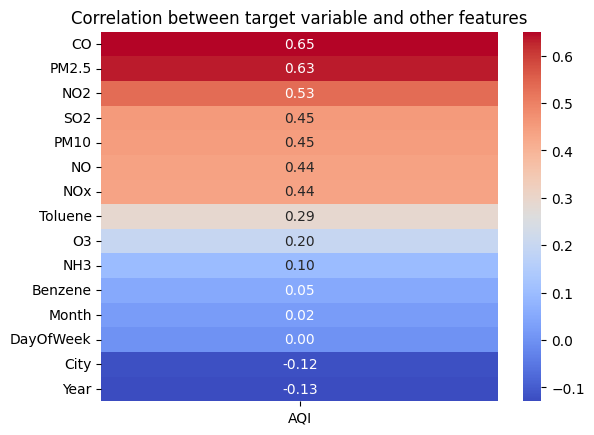

In [125]:
a=a.drop('AQI')
sns.heatmap(a.to_frame(),annot=True,fmt='.2f',cmap='coolwarm',annot_kws={'size':10},cbar=True)
plt.title('Correlation between target variable and other features')
plt.show()

In [126]:
df.drop('Toluene',axis=1,inplace=True)
df.drop('O3',axis=1,inplace=True)
df.drop('NH3',axis=1,inplace=True)
df.drop('Month',axis=1,inplace=True)
df.drop('DayOfWeek',axis=1,inplace=True)
df.drop('City',axis=1,inplace=True)
df.drop('Year',axis=1,inplace=True)
df.drop('Benzene',axis=1,inplace=True)

In [127]:
df

,PM2.5,PM10,NO,NO2,NOx,CO,SO2,AQI
0,48.57,95.68,0.92,18.22,17.15,0.92,27.64,118.0
1,48.57,95.68,0.97,15.69,16.46,0.97,24.55,118.0
2,48.57,95.68,17.40,19.30,29.70,17.40,29.07,118.0
3,48.57,95.68,1.70,18.48,17.97,1.70,18.59,118.0
4,48.57,95.68,22.10,21.42,37.76,22.10,39.33,118.0
...,...,...,...,...,...,...,...,...
29526,15.02,50.94,7.68,25.06,19.54,0.47,8.55,41.0
29527,24.38,74.09,3.42,26.06,16.53,0.52,12.72,70.0
29528,22.91,65.73,3.45,29.53,18.33,0.48,8.42,68.0
29529,16.64,49.97,4.05,29.26,18.80,0.52,9.84,54.0


array([[<Axes: title={'center': 'PM2.5'}>,
        <Axes: title={'center': 'PM10'}>, <Axes: title={'center': 'NO'}>],
       [<Axes: title={'center': 'NO2'}>, <Axes: title={'center': 'NOx'}>,
        <Axes: title={'center': 'CO'}>],
       [<Axes: title={'center': 'SO2'}>, <Axes: title={'center': 'AQI'}>,
        <Axes: >]], dtype=object)

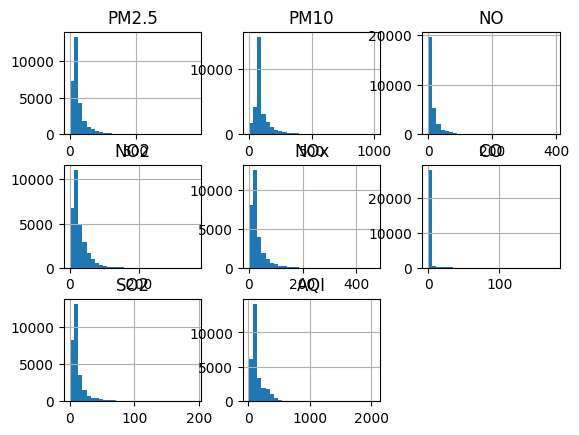

In [128]:
df.hist(bins=30)

In [129]:
import numpy as np
df['PM2.5']=np.log1p(df['PM2.5'])
df['PM10']=np.log1p(df['PM10'])
df['NO']=np.log1p(df['NO'])
df['NO2']=np.log1p(df['NO2'])
df['NOx']=np.log1p(df['NOx'])
df['CO']=np.log1p(df['CO'])
df['SO2']=np.log1p(df['SO2'])

array([[<Axes: title={'center': 'PM2.5'}>,
        <Axes: title={'center': 'PM10'}>, <Axes: title={'center': 'NO'}>],
       [<Axes: title={'center': 'NO2'}>, <Axes: title={'center': 'NOx'}>,
        <Axes: title={'center': 'CO'}>],
       [<Axes: title={'center': 'SO2'}>, <Axes: title={'center': 'AQI'}>,
        <Axes: >]], dtype=object)

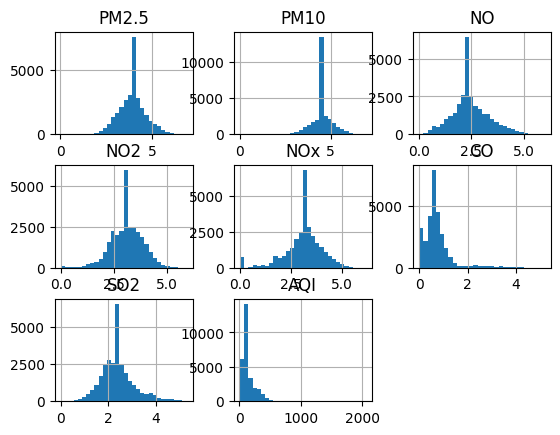

In [130]:
df.hist(bins=30)

<Axes: >

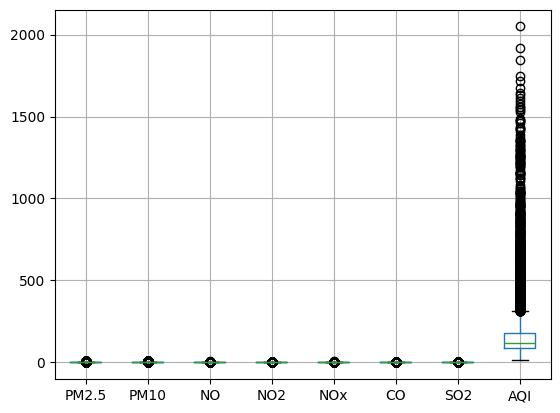

In [131]:
#Outlier checking and removing outlier

df.boxplot()

In [132]:
# Function to remove outliers using the IQR method except for one column
def remove_outliers_iqr(df, exclude_column):
    for col in df.columns:
        # Skip the specified column
        if col == exclude_column:
            continue
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Filter the DataFrame to remove rows with outliers in each column
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Specify the column to exclude
df_cleaned = remove_outliers_iqr(df, exclude_column='DayOfWeek')
df=df_cleaned

In [133]:
from sklearn.model_selection import train_test_split
X = df[['PM2.5', 'PM10', 'NOx',"SO2","NO2","CO"]]  # Features
y = df['AQI']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # You can adjust the test_size and random_state



from sklearn.linear_model import LinearRegression
model = LinearRegression() #creating a variable of LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}, RMSE: {rmse}, R-squared: {r2}")

MSE: 406.2807387188645, RMSE: 20.156406890089922, R-squared: 0.5783667947356337


# **Data Scaling**

In [134]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming  DataFrame is called 'df'
# Select the features that  want to scale
features = ['PM2.5', 'PM10', 'NOx',"SO2","NO2","CO"]

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to  data and transform it
scaled_data = scaler.fit_transform(df[features])

# Create a new DataFrame with the scaled data (optional)
scaled_df = pd.DataFrame(scaled_data, columns=features, index=df.index)

<Axes: >

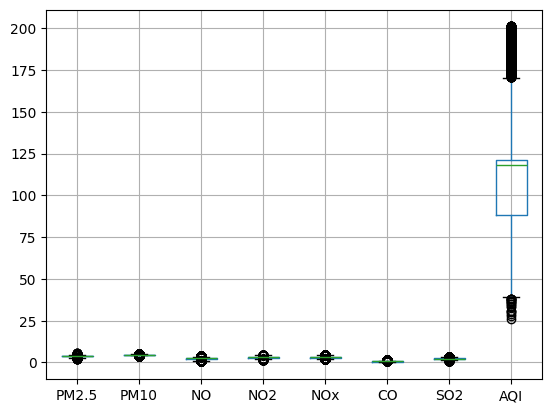

In [135]:
df.boxplot()

In [136]:
df.shape

(14763, 8)

In [137]:
df["AQI"]=np.log1p(df["AQI"])

array([[<Axes: title={'center': 'AQI'}>]], dtype=object)

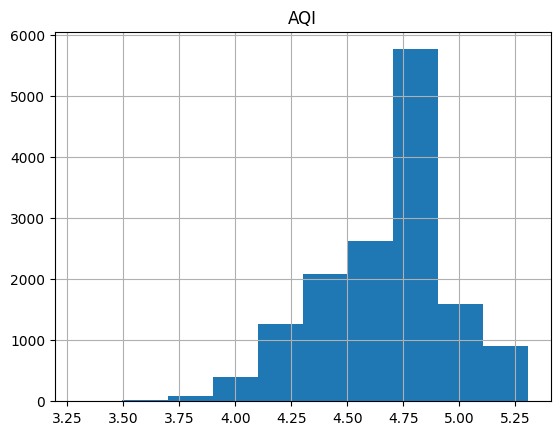

In [138]:
df.hist('AQI')

In [139]:
from sklearn.model_selection import train_test_split
X = df[['PM2.5', 'PM10', 'NOx',"SO2","NO2","CO"]]  # Features
y = df['AQI']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # You can adjust the test_size and random_state



from sklearn.linear_model import LinearRegression
model = LinearRegression() #creating a variable of LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}, RMSE: {rmse}, R-squared: {r2}")

MSE: 0.03465847962588681, RMSE: 0.1861678802207481, R-squared: 0.5909480600303705


In [140]:
df.shape

(14763, 8)